To compare different ones (one with SAM and one without) we take the results, store them, and plot them in the same function.

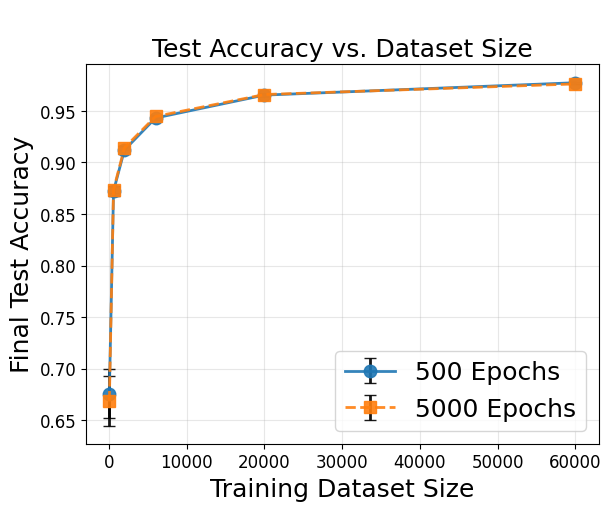

✅ Comparison plot saved.


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt

# ============================
# Compare two saved .npz files
# ============================

# --- User configuration ---
base_output_dir = "."
file_A = os.path.join(base_output_dir, "test_acc_base.npz")
file_B = os.path.join(base_output_dir, "test_acc_long_epoch.npz")

label_A = "500 Epochs"
label_B = "5000 Epochs"

# --- Check existence ---
missing = [f for f in [file_A, file_B] if not os.path.exists(f)]
if missing:
    print(f"❌ Missing files:\n{missing}")
else:
    # --- Load both datasets ---
    data_A = np.load(file_A)
    data_B = np.load(file_B)

    sizes_A = data_A["dataset_sizes"]
    mean_A = data_A["mean_accuracies"]
    std_A = data_A["std_accuracies"]

    sizes_B = data_B["dataset_sizes"]
    mean_B = data_B["mean_accuracies"]
    std_B = data_B["std_accuracies"]

    # --- Plot comparison ---
    plt.figure(figsize=(6, 5), constrained_layout=True)

    plt.errorbar(
        sizes_A, mean_A, yerr=std_A,
        fmt='o-', capsize=4, linewidth=2, markersize=9,
        color='tab:blue', ecolor='black', alpha=0.9, label=label_A
    )
    
    plt.errorbar(
        sizes_B, mean_B, yerr=std_B,
        fmt='s--', capsize=4, linewidth=2, markersize=9,
        color='tab:orange', ecolor='black', alpha=0.9, label=label_B
    )
    
    #plt.xscale("log")
    
    # === Apply your visual parameters ===
    plt.xlabel("Training Dataset Size", fontsize=18)
    plt.ylabel("Final Test Accuracy", fontsize=18)
    plt.title(" \nTest Accuracy vs. Dataset Size", fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.legend(
        fontsize=18,
        loc="lower right"
    )
    
    plt.grid(True, alpha=0.3)
    #plt.tight_layout()
    
    plt.savefig("imgs/test_acc_comparison.png", bbox_inches="tight")
    plt.show()
    plt.close()
    
    print(f"✅ Comparison plot saved.")


In [2]:
# --- Print nicely ---
print("Dataset Size | AdamW Mean Accuracy | SAM Mean Accuracy")
print("-----------------------------------------------")
for s_A, m_A, s_B, m_B in zip(sizes_A, mean_A, sizes_B, mean_B):
    print(f"{s_A:12} | {m_A:18.4f} | {m_B:16.4f}")

Dataset Size | AdamW Mean Accuracy | SAM Mean Accuracy
-----------------------------------------------
          60 |             0.6756 |           0.6684
         600 |             0.8724 |           0.8736
        2000 |             0.9121 |           0.9143
        6000 |             0.9432 |           0.9446
       20000 |             0.9654 |           0.9659
       60000 |             0.9774 |           0.9762
